# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
colab_directory_path = '/content/gdrive/MyDrive/riveter-test'

In [5]:
%cd /content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter

/content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter


In [2]:
!pip install -U spacy-experimental

In [7]:
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 617.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [8]:
!python -m spacy download en_core_web_sm

2024-03-13 22:09:50.980994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 22:09:50.981163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 22:09:51.087623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 22:09:51.327301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 22:09:53.347922: W tensorflow/compiler/tf2

In [9]:
!pip install seaborn

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [11]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv("/BTS_short_100.csv", encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [12]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [13]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [14]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

#### H0 (answer in words):
There is no relationship between the levels of of masculinity in male characters and fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


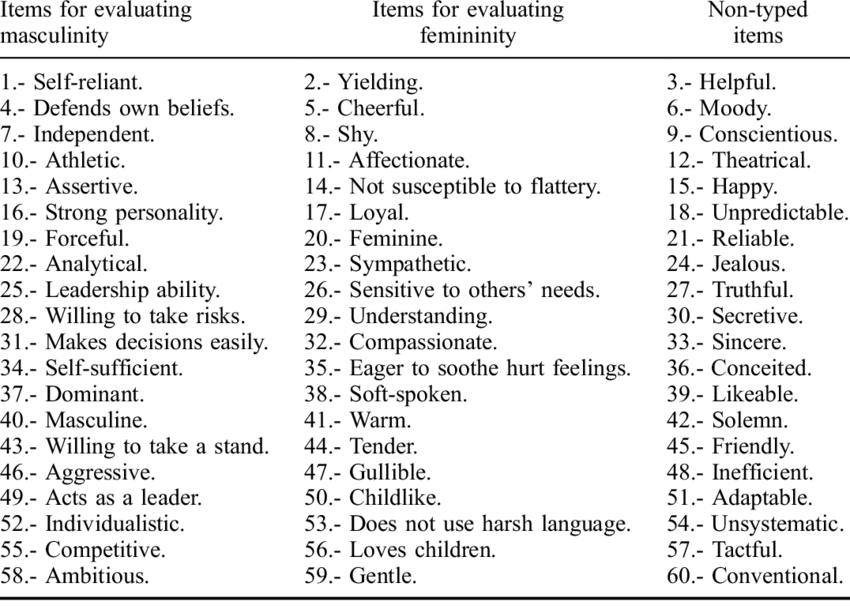

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [15]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [16]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments


Let's first initialize Riveter with the lexicon that we are going to use:

In [17]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
scores_dict={}
riveter = Riveter()
riveter.load_sap_lexicon('power')

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [19]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments, text_ids, num_bootstraps=10, persona_patterns_dict= {'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:21<31:43, 21.38s/it]

2024-03-13 22:14:03 Complete!
Story ID: 4706144, Masculine Power Score: 0.08699877615895413



Processing stories:   2%|▏         | 2/90 [00:41<29:55, 20.41s/it]

2024-03-13 22:14:23 Complete!
Story ID: 4752980, Masculine Power Score: 0.19929457304464623



Processing stories:   3%|▎         | 3/90 [00:59<28:00, 19.31s/it]

2024-03-13 22:14:41 Complete!
Story ID: 4621698, Masculine Power Score: 0.5815873015873015



Processing stories:   4%|▍         | 4/90 [01:18<27:49, 19.42s/it]

2024-03-13 22:15:00 Complete!
Story ID: 3651108, Masculine Power Score: 0.11713695606598422



Processing stories:   6%|▌         | 5/90 [01:39<28:04, 19.82s/it]

2024-03-13 22:15:21 Complete!
Story ID: 5282729, Masculine Power Score: 0.21189330024813896



Processing stories:   7%|▋         | 6/90 [01:59<27:54, 19.93s/it]

2024-03-13 22:15:41 Complete!
Story ID: 5533886, Masculine Power Score: -0.02162037037037037



Processing stories:   8%|▊         | 7/90 [02:20<28:07, 20.34s/it]

2024-03-13 22:16:02 Complete!
Story ID: 4547622, Masculine Power Score: 0.06543987148102814



Processing stories:   9%|▉         | 8/90 [02:37<26:31, 19.41s/it]

2024-03-13 22:16:19 Complete!
Story ID: 16177508, Masculine Power Score: 0.1581611459475601



Processing stories:  10%|█         | 9/90 [02:58<26:42, 19.79s/it]

2024-03-13 22:16:40 Complete!
Story ID: 15745185, Masculine Power Score: -0.09305686458689211



 33%|███▎      | 1/3 [00:10<00:20, 10.10s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [03:18<26:33, 19.92s/it]

2024-03-13 22:17:00 Complete!
Story ID: 15654528, Masculine Power Score: 0.25636920142734093



Processing stories:  12%|█▏        | 11/90 [03:37<25:35, 19.44s/it]

2024-03-13 22:17:19 Complete!
Story ID: 7448155, Masculine Power Score: 0.337944689119979



Processing stories:  13%|█▎        | 12/90 [03:57<25:41, 19.76s/it]

2024-03-13 22:17:39 Complete!
Story ID: 4983847, Masculine Power Score: 0.10295453813709392



Processing stories:  14%|█▍        | 13/90 [04:17<25:19, 19.74s/it]

2024-03-13 22:17:59 Complete!
Story ID: 3313118, Masculine Power Score: -0.1772179089026915



Processing stories:  16%|█▌        | 14/90 [04:36<24:55, 19.67s/it]

2024-03-13 22:18:18 Complete!
Story ID: 3290390, Masculine Power Score: -0.0909817750114889



Processing stories:  17%|█▋        | 15/90 [04:58<25:24, 20.33s/it]

2024-03-13 22:18:40 Complete!
Story ID: 36435301, Masculine Power Score: -0.0027738264580369847



Processing stories:  18%|█▊        | 16/90 [05:17<24:40, 20.00s/it]

2024-03-13 22:18:59 Complete!
Story ID: 36575491, Masculine Power Score: 0.2673521608789489



Processing stories:  19%|█▉        | 17/90 [05:37<24:19, 20.00s/it]

2024-03-13 22:19:19 Complete!
Story ID: 35225224, Masculine Power Score: 0.24492384350920154



Processing stories:  20%|██        | 18/90 [05:57<23:42, 19.76s/it]

2024-03-13 22:19:39 Complete!
Story ID: 4594527, Masculine Power Score: 0.2347039072039072



Processing stories:  21%|██        | 19/90 [06:14<22:36, 19.10s/it]

2024-03-13 22:19:56 Complete!
Story ID: 5485625, Masculine Power Score: 0.10199180130214613



Processing stories:  22%|██▏       | 20/90 [06:37<23:28, 20.13s/it]

2024-03-13 22:20:19 Complete!
Story ID: 36408319, Masculine Power Score: 0.1859454518649565



Processing stories:  23%|██▎       | 21/90 [06:59<24:01, 20.90s/it]

2024-03-13 22:20:41 Complete!
Story ID: 35762659, Masculine Power Score: 0.2028033486946954



Processing stories:  24%|██▍       | 22/90 [07:20<23:42, 20.92s/it]

2024-03-13 22:21:02 Complete!
Story ID: 35603194, Masculine Power Score: 0.3575019925292158



Processing stories:  26%|██▌       | 23/90 [07:41<23:08, 20.72s/it]

2024-03-13 22:21:23 Complete!
Story ID: 35344306, Masculine Power Score: 0.11863060435955383



Processing stories:  27%|██▋       | 24/90 [07:58<21:46, 19.79s/it]

2024-03-13 22:21:40 Complete!
Story ID: 36695155, Masculine Power Score: 0.13111111111111112



Processing stories:  28%|██▊       | 25/90 [08:19<21:53, 20.21s/it]

2024-03-13 22:22:01 Complete!
Story ID: 36064474, Masculine Power Score: 0.09591918624255366



Processing stories:  29%|██▉       | 26/90 [08:40<21:37, 20.28s/it]

2024-03-13 22:22:22 Complete!
Story ID: 36024820, Masculine Power Score: 0.16962114531773975



Processing stories:  30%|███       | 27/90 [09:04<22:21, 21.29s/it]

2024-03-13 22:22:46 Complete!
Story ID: 35182330, Masculine Power Score: 0.012345271259291227



Processing stories:  31%|███       | 28/90 [09:26<22:15, 21.55s/it]

2024-03-13 22:23:08 Complete!
Story ID: 36567496, Masculine Power Score: 0.20796971632884945



Processing stories:  32%|███▏      | 29/90 [09:47<21:46, 21.42s/it]

2024-03-13 22:23:29 Complete!
Story ID: 35560330, Masculine Power Score: 0.10443066729152022



Processing stories:  33%|███▎      | 30/90 [10:10<22:01, 22.02s/it]

2024-03-13 22:23:52 Complete!
Story ID: 35877496, Masculine Power Score: 0.12628001243823717



Processing stories:  34%|███▍      | 31/90 [10:31<21:18, 21.68s/it]

2024-03-13 22:24:13 Complete!
Story ID: 35957410, Masculine Power Score: 0.2893726402973552



Processing stories:  36%|███▌      | 32/90 [10:52<20:40, 21.38s/it]

2024-03-13 22:24:34 Complete!
Story ID: 30947654, Masculine Power Score: 0.05764860426929393



Processing stories:  37%|███▋      | 33/90 [11:13<20:20, 21.42s/it]

2024-03-13 22:24:55 Complete!
Story ID: 36332707, Masculine Power Score: -0.09942776170397655



Processing stories:  38%|███▊      | 34/90 [11:37<20:30, 21.98s/it]

2024-03-13 22:25:19 Complete!
Story ID: 35967940, Masculine Power Score: 0.1773204719828986



Processing stories:  39%|███▉      | 35/90 [11:59<20:08, 21.98s/it]

2024-03-13 22:25:41 Complete!
Story ID: 35001073, Masculine Power Score: 0.0953990453990454



Processing stories:  40%|████      | 36/90 [12:21<19:53, 22.10s/it]

2024-03-13 22:26:03 Complete!
Story ID: 35138911, Masculine Power Score: 0.13710897435897434



Processing stories:  41%|████      | 37/90 [12:40<18:42, 21.17s/it]

2024-03-13 22:26:22 Complete!
Story ID: 35280397, Masculine Power Score: 0.21322488038277512



Processing stories:  42%|████▏     | 38/90 [13:03<18:51, 21.76s/it]

2024-03-13 22:26:45 Complete!
Story ID: 36049939, Masculine Power Score: 0.327948169929708



Processing stories:  43%|████▎     | 39/90 [13:27<18:56, 22.28s/it]

2024-03-13 22:27:09 Complete!
Story ID: 34995673, Masculine Power Score: 0.168716685324472



Processing stories:  44%|████▍     | 40/90 [13:51<19:02, 22.84s/it]

2024-03-13 22:27:33 Complete!
Story ID: 33477346, Masculine Power Score: 0.4338636363636364



Processing stories:  46%|████▌     | 41/90 [14:10<17:44, 21.73s/it]

2024-03-13 22:27:52 Complete!
Story ID: 36840832, Masculine Power Score: -0.20734265734265733



Processing stories:  47%|████▋     | 42/90 [14:28<16:28, 20.59s/it]

2024-03-13 22:28:10 Complete!
Story ID: 30896276, Masculine Power Score: 0.17142857142857146



Processing stories:  48%|████▊     | 43/90 [14:46<15:36, 19.93s/it]

2024-03-13 22:28:28 Complete!
Story ID: 37363471, Masculine Power Score: 0.4438672438672439



Processing stories:  49%|████▉     | 44/90 [15:05<15:02, 19.62s/it]

2024-03-13 22:28:47 Complete!
Story ID: 36984901, Masculine Power Score: 0.25278680214741595



Processing stories:  50%|█████     | 45/90 [15:25<14:41, 19.58s/it]

2024-03-13 22:29:07 Complete!
Story ID: 33353644, Masculine Power Score: 0.005763965963743986



Processing stories:  51%|█████     | 46/90 [15:44<14:24, 19.65s/it]

2024-03-13 22:29:26 Complete!
Story ID: 37002835, Masculine Power Score: -0.1549206349206349



Processing stories:  52%|█████▏    | 47/90 [16:03<13:54, 19.41s/it]

2024-03-13 22:29:45 Complete!
Story ID: 5630824, Masculine Power Score: 0.32456140350877194



Processing stories:  53%|█████▎    | 48/90 [16:24<13:56, 19.92s/it]

2024-03-13 22:30:06 Complete!
Story ID: 10053617, Masculine Power Score: 0.2279000207893004



Processing stories:  54%|█████▍    | 49/90 [16:50<14:43, 21.55s/it]

2024-03-13 22:30:32 Complete!
Story ID: 1572659, Masculine Power Score: 0.2437237762237762



Processing stories:  56%|█████▌    | 50/90 [17:11<14:23, 21.59s/it]

2024-03-13 22:30:53 Complete!
Story ID: 7450573, Masculine Power Score: 0.16320943762120232



Processing stories:  57%|█████▋    | 51/90 [17:32<13:55, 21.43s/it]

2024-03-13 22:31:14 Complete!
Story ID: 6918676, Masculine Power Score: 0.018262226703151068



Processing stories:  58%|█████▊    | 52/90 [17:56<14:00, 22.13s/it]

2024-03-13 22:31:38 Complete!
Story ID: 6075402, Masculine Power Score: 0.36950399873184653



Processing stories:  59%|█████▉    | 53/90 [18:18<13:39, 22.15s/it]

2024-03-13 22:32:00 Complete!
Story ID: 11101779, Masculine Power Score: 0.3264285714285714



Processing stories:  60%|██████    | 54/90 [18:42<13:30, 22.51s/it]

2024-03-13 22:32:24 Complete!
Story ID: 11321331, Masculine Power Score: 0.14922186988622788



Processing stories:  61%|██████    | 55/90 [19:01<12:32, 21.50s/it]

2024-03-13 22:32:43 Complete!
Story ID: 12284853, Masculine Power Score: 0.22264328274289236



Processing stories:  62%|██████▏   | 56/90 [19:21<11:52, 20.94s/it]

2024-03-13 22:33:02 Complete!
Story ID: 12282003, Masculine Power Score: 0.11809941520467834



Processing stories:  63%|██████▎   | 57/90 [19:39<11:08, 20.27s/it]

2024-03-13 22:33:21 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [19:58<10:31, 19.74s/it]

2024-03-13 22:33:40 Complete!
Story ID: 4228053, Masculine Power Score: 0.212096147048427



Processing stories:  66%|██████▌   | 59/90 [20:19<10:27, 20.23s/it]

2024-03-13 22:34:01 Complete!
Story ID: 12127317, Masculine Power Score: 0.14044008240410039



Processing stories:  67%|██████▋   | 60/90 [20:37<09:47, 19.59s/it]

2024-03-13 22:34:19 Complete!
Story ID: 12010134, Masculine Power Score: 0.2386654266449663



Processing stories:  68%|██████▊   | 61/90 [20:59<09:47, 20.26s/it]

2024-03-13 22:34:41 Complete!
Story ID: 11510919, Masculine Power Score: 0.49759784075573543



Processing stories:  69%|██████▉   | 62/90 [21:20<09:36, 20.59s/it]

2024-03-13 22:35:02 Complete!
Story ID: 8145802, Masculine Power Score: 0.2635140894683925



Processing stories:  70%|███████   | 63/90 [21:41<09:13, 20.49s/it]

2024-03-13 22:35:23 Complete!
Story ID: 6637942, Masculine Power Score: -0.12977763903044054



Processing stories:  71%|███████   | 64/90 [22:00<08:46, 20.23s/it]

2024-03-13 22:35:42 Complete!
Story ID: 7427905, Masculine Power Score: -0.024395866454689986



Processing stories:  72%|███████▏  | 65/90 [22:19<08:17, 19.92s/it]

2024-03-13 22:36:01 Complete!
Story ID: 3893857, Masculine Power Score: 0.12370290464199454



Processing stories:  73%|███████▎  | 66/90 [22:39<07:58, 19.92s/it]

2024-03-13 22:36:21 Complete!
Story ID: 33040258, Masculine Power Score: 0.15246031746031746



Processing stories:  74%|███████▍  | 67/90 [23:01<07:50, 20.44s/it]

2024-03-13 22:36:43 Complete!
Story ID: 33858850, Masculine Power Score: -0.15357581530956146



Processing stories:  76%|███████▌  | 68/90 [23:23<07:36, 20.76s/it]

2024-03-13 22:37:05 Complete!
Story ID: 2775776, Masculine Power Score: 0.22550227550227547



Processing stories:  77%|███████▋  | 69/90 [23:44<07:18, 20.86s/it]

2024-03-13 22:37:26 Complete!
Story ID: 3197963, Masculine Power Score: 0.26833333333333337



Processing stories:  78%|███████▊  | 70/90 [24:04<06:55, 20.79s/it]

2024-03-13 22:37:46 Complete!
Story ID: 12395199, Masculine Power Score: 0.1788335396697766



Processing stories:  79%|███████▉  | 71/90 [24:23<06:24, 20.24s/it]

2024-03-13 22:38:05 Complete!
Story ID: 10934010, Masculine Power Score: 0.23679690679690682



Processing stories:  80%|████████  | 72/90 [24:43<06:01, 20.10s/it]

2024-03-13 22:38:25 Complete!
Story ID: 12301116, Masculine Power Score: -0.014937315922537601



Processing stories:  81%|████████  | 73/90 [25:03<05:43, 20.21s/it]

2024-03-13 22:38:45 Complete!
Story ID: 12706317, Masculine Power Score: -0.058385622529644264



Processing stories:  82%|████████▏ | 74/90 [25:26<05:33, 20.84s/it]

2024-03-13 22:39:08 Complete!
Story ID: 11499468, Masculine Power Score: -0.16386494252873562



Processing stories:  83%|████████▎ | 75/90 [25:45<05:04, 20.31s/it]

2024-03-13 22:39:27 Complete!
Story ID: 12184146, Masculine Power Score: 0.31369881693481017



Processing stories:  84%|████████▍ | 76/90 [26:04<04:40, 20.04s/it]

2024-03-13 22:39:46 Complete!
Story ID: 12201333, Masculine Power Score: 0.10580706075533661



Processing stories:  86%|████████▌ | 77/90 [26:27<04:30, 20.84s/it]

2024-03-13 22:40:09 Complete!
Story ID: 11496030, Masculine Power Score: 0.035245961736739606



Processing stories:  87%|████████▋ | 78/90 [26:51<04:20, 21.73s/it]

2024-03-13 22:40:33 Complete!
Story ID: 11510277, Masculine Power Score: 0.26052221200516285



Processing stories:  88%|████████▊ | 79/90 [27:14<04:05, 22.28s/it]

2024-03-13 22:40:56 Complete!
Story ID: 10772274, Masculine Power Score: 0.4949852083790377



Processing stories:  89%|████████▉ | 80/90 [27:35<03:38, 21.80s/it]

2024-03-13 22:41:17 Complete!
Story ID: 12646050, Masculine Power Score: 0.07184331148727434



Processing stories:  90%|█████████ | 81/90 [27:55<03:10, 21.19s/it]

2024-03-13 22:41:37 Complete!
Story ID: 11161479, Masculine Power Score: -0.01143980304748415



Processing stories:  91%|█████████ | 82/90 [28:14<02:45, 20.70s/it]

2024-03-13 22:41:56 Complete!
Story ID: 12069936, Masculine Power Score: 0.025724397867255014



Processing stories:  92%|█████████▏| 83/90 [28:35<02:25, 20.74s/it]

2024-03-13 22:42:17 Complete!
Story ID: 12285972, Masculine Power Score: 0.33619754562700827



Processing stories:  93%|█████████▎| 84/90 [28:54<02:01, 20.28s/it]

2024-03-13 22:42:36 Complete!
Story ID: 12372702, Masculine Power Score: -0.012531328320802



Processing stories:  94%|█████████▍| 85/90 [29:15<01:42, 20.44s/it]

2024-03-13 22:42:57 Complete!
Story ID: 12610496, Masculine Power Score: 0.08175420240448386



Processing stories:  96%|█████████▌| 86/90 [29:36<01:22, 20.58s/it]

2024-03-13 22:43:18 Complete!
Story ID: 10970472, Masculine Power Score: 0.17279341029341028



Processing stories:  97%|█████████▋| 87/90 [29:54<00:59, 19.81s/it]

2024-03-13 22:43:36 Complete!
Story ID: 12084552, Masculine Power Score: 0.31393717880559985



Processing stories:  98%|█████████▊| 88/90 [30:17<00:41, 20.73s/it]

2024-03-13 22:43:59 Complete!
Story ID: 12727119, Masculine Power Score: -0.1004586201389636



Processing stories:  99%|█████████▉| 89/90 [30:36<00:20, 20.33s/it]

2024-03-13 22:44:18 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [30:56<00:00, 20.63s/it]

2024-03-13 22:44:38 Complete!
Story ID: 10859508, Masculine Power Score: 0.2836303194745047


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [20]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.086999
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.199295
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.581587
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117137
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.211893


In [21]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/gdrive/MyDrive/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [22]:
!pip install lexicalrichness

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=3c5980227ab1de04e9c3dd711223b4c43f0e628bab920062eba6631f54374601
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness


In [23]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.086999,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.199295,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.581587,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117137,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.211893,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'lexical_richness'}>, <Axes: >, <Axes: >]],
      dtype=object)

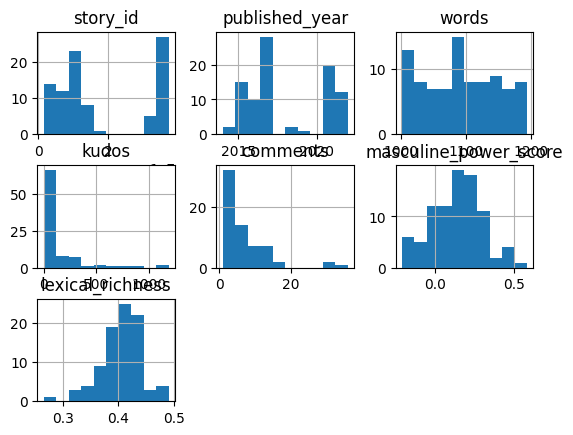

In [24]:
# Q3a (code): Check data distribution
df.hist()



In [25]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.145941,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.161451,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.207343,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.028105,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.155311,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.244624,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.581587,0.491349


In [28]:
# Q3c (code): Check for any missing values
df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

In [27]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df.fillna(0, inplace=True)

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

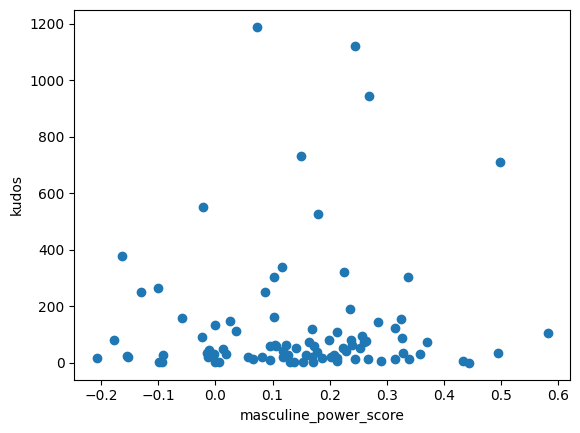

In [29]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
masculine_power_score=df['masculine_power_score']
kudos=df['kudos']
plt.scatter(masculine_power_score, kudos)
plt.xlabel("masculine_power_score")
plt.ylabel("kudos")
plt.show()

**Q5. Multiple Regression and Analysis**

In [30]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
# Fitting the multiple linear regression model
from sklearn.linear_model import LinearRegression # To fit the model
import statsmodels.api as sm # Imported to use add_constant() function and OLS() function

predictor=df[['masculine_power_score','published_year','words']]
response=df['kudos']
model = LinearRegression()
model.fit(predictor, response)

# For statsmodels, adding a constant to include an intercept in the model.
# Through the code below, we can get the model summary which includes R-squared and Adj. R-squared
predictor_sm = sm.add_constant(predictor)
model_sm = sm.OLS(response, predictor_sm).fit()
print(model_sm.summary())

# The F-test is included in the model summary
print("F-statistic and its significance (p-value):")
print(f"F-statistic: {model_sm.fvalue}")
print(f"P-value of F-statistic: {model_sm.f_pvalue}")

# The t-tests for individual predictors are also included in the model summary
print("Coefficients and their t-tests:")
print(model_sm.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.591
Date:                Wed, 13 Mar 2024   Prob (F-statistic):            0.00150
Time:                        22:49:53   Log-Likelihood:                -608.27
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.021e+

**Q6. Interpret the results of the regression analysis**

#### Q6a (words): Interpret the R-squared and Adj. R-squared
The R-squared and adjusted R-squared values provide information about how well the independent variables in the regression model explain the variation in the dependent variable. The closer R2 is to 1, the closer the actual observation points are to the sample line, indicating a higher
goodness of fit. In this case, the relatively low R-squared value (0.163) suggest that the model explains only about 16.3% of the variability in the kudos, and the model's fiteness is low. The adjusted R-squared value of 0.134 indicates that approximately 13.4% of the variability in the kudos can be explained by the model. It shows a slight decrease from the R-squared value, which is normal as it balances the impact of increasing the number of independent variables on the loss of degrees of freedom.

#### Q6b (words): Interpret F-test result
H0: None of the independent variables have a significant effect on the dependent variable.
H1: There is a significant effect of at least one independent variable on the dependent variable.
In this case, P-value of F-statistic is lower than 0.05, which rejects H0 and confirms that at least one independent variable has a significant effect on "kudos".

#### Q6c (words): Interpret coefficients and t-test result
For each predictor, if p-value is lower than 0.05, the null hypothesis that the corresponding coefficient is zero will be rejected, which indicates a statistically significant relationship between the predictor and the response variable. In this case, p-value of "published_year" is lower than 0.05, which suggests that it has a significant effect on "kudos". Besides, the coeffient is lower than zero, which reveals that more recent stories tend to have fewer kudos. However, "masculine_power_score" and "words" do not appear to significantly affect "kudos", as their p-values are greater than 0.05.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [31]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
# H0: The residuals data are normally distributed
# H1: The residuals data are NOT normally distributed

from scipy import stats # To perform Shapiro-Wilk test
# First we get predictions through this model
predictions=model.predict(predictor)

# Now we have response and predictions, and we can calculate residuals
residuals=response-predictions

# Then we will use Shapiro-Wilk test for normality
score_shapiro, pvalue_shapiro = stats.shapiro(residuals)
print('Shapiro-Wilk Test:', score_shapiro, pvalue_shapiro)
if pvalue_shapiro<0.05:
  print('Reject H0: The residuals data are NOT normally distributed')
else:
  print('Confirm H0: The residuals data are normally distributed')

Shapiro-Wilk Test: 0.6959435343742371 2.33416909932449e-12
Reject H0: The residuals data are NOT normally distributed


#### Q7b (words): Write your analysis for the Normality Test there:
H0: The residuals data are normally distributed.
H1: The residuals data are NOT normally distributed. P-value of the Shapiro test is lower than 0.05, which rejects H0 and confirms H1 that the residuals data are NOT normally distributed.

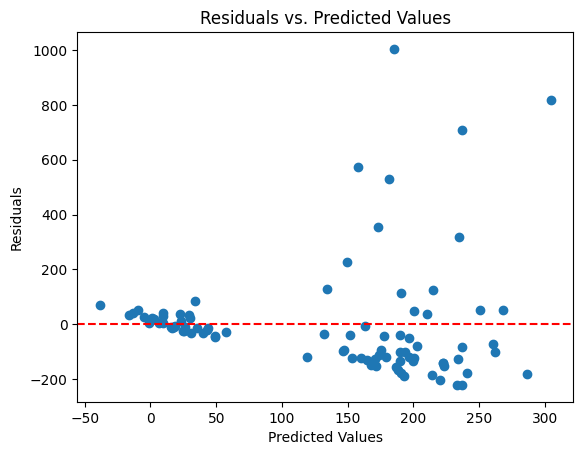

In [32]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
plt.scatter(predictions, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

#### Q7d (words): Write your analysis for the Homoscedasticity Test here:
If the spread of the residuals approximately constant across all levels of predicted values, the data exhibits homoscedasticity. If the spread increases or decreases with the predicted values, the data exhibits heteroscedasticity, suggesting that the model may not give equally reliable predictions across all values of the independent variables. In this case, residuals scatter around zero but the variance of the residuals noticeably changes with increasing predicted values, indicating the heteroscedasticity of the data.

**Q8: Multicollinearity**

In [35]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = predictor.columns
vif_data["VIF"] = [variance_inflation_factor(predictor.values, i) for i in range(len(predictor.columns))]

print(vif_data)

                 feature         VIF
0  masculine_power_score    1.829368
1         published_year  399.423637
2                  words  397.069722


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

#### Q8b (words): Write your analysis for the multicollinearity test here:
The VIF values of "published_year" and "words" are much higher than 10, which suggests a high level of multicollinearity. The "published_year" and "words" variables can distort the regression coefficients and p-values, making them unreliable or difficult to interpret.

**Q9: Reflection**

#### Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?
The procedural rigor in preparing data, checking assumptions, fitting the model, and evaluating the results is crucial for reliable regression analysis. In this case, the normality and homoscedasticity tests of residuals data should be conducted at the start. The residuals data in this case are not normally distributed and exhibits heteroscedasticity, which will make the evaluation results (such as the results of F-test， T-test and R-squared) inaccurate and lead to a wrong conclusion.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.